# Experimental design

This experiments will address the effectiveness of irrigation and nitrogen fertilization to increase yield in the selected districts of Zimbabwe. For this a factorial experiment considering two factors: irrigation and nitrogen fertilization.

Nitrogen fertilization will be defined as a percentage of the recommended rate. Then, 5 nitrogen fertilization levels will be considered:
 - No nitrogen fertilization
 - 10% of recommended
 - 25% of recommended
 - 50% of recommended
 - 100% of recommended
 - 500% of recommended

Irrigation will be defined based on the minimum water available as a percentage of the total available water in the management soil profile. It will be defined using the DSSAT automatic irrigation feature. The automatic irrigation in DSSAT applies automatic irrigation using three parameters: depth of management soil profile, IMDEP (cm); lower threshold of the total available water (TAW), ITHRL (%); and upper threshold of TAW, ITHRU (%). In automatic irrigation mode, the amount of irrigation applied is the one needed to bring the first *IMDEP* cm of the soil profile from *ITHRL*% of TAW, to *ITHRU*% of TAW. With this definition, 4 levels are defined for the irrigation factor:
 - No irrigation (Rainfed)
 - TAW > 25%
 - TAW > 50%
 - TAW > 75%

These levels are defined by the minimum amount of water available in the management soil profile. In this case, for example, the *TAW > 25%* level means that the management soil profile will always have over 25% of the TAW. 

In [1]:
from dssat_run import run_district
from itertools import product

import multiprocessing
from tqdm.notebook import tqdm

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

# Define constants and functions

In [2]:
IRRIGATION_LEVELS = {
    "Rainfed": {"IRRIG": "N"},
    "25% TAW": {"IRRIG": "A", "IMDEP": 30, "ITHRL": 25, "ITHRU": 100},
    "50% TAW": {"IRRIG": "A", "IMDEP": 30, "ITHRL": 50, "ITHRU": 100},
    "75% TAW": {"IRRIG": "A", "IMDEP": 30, "ITHRL": 75, "ITHRU": 100}
}
NITROGEN_LEVELS = {
    "No fertilizer": 0, "10% recommended": .1, "25% recommended": .25, 
    "50% recommended": .5, "100% recommended": 1., "200% recommended": 2., 
    "500% recommended": 5., 
}
RECOMMENDED_NRATE = 70

In [3]:
# Functions to run all treatments for a single year
def run_single_year(district, year):
    df_list = []
    for irr_level, nitro_level in product(IRRIGATION_LEVELS, NITROGEN_LEVELS):
        df, _ = run_district(
            admin_2=district, year=year, 
            nitro_rate=NITROGEN_LEVELS[nitro_level]*RECOMMENDED_NRATE,
            sim_controls=IRRIGATION_LEVELS[irr_level]
        )
        df["nitrogen"] = nitro_level
        df["irrigation"] = irr_level
        df["year"] = year
        df["admin_2"] = district
        df_list.append(df)
    return pd.concat(df_list)

## Test function on a single district and year

In [4]:
%%time
df = run_single_year("Chivi", 2020)

CPU times: user 2.42 s, sys: 429 ms, total: 2.85 s
Wall time: 1min 33s


In [5]:
df.groupby(["nitrogen", "irrigation"]).apply(lambda gb: gb.HARWT.astype(int).describe())

HARWT                        count     mean         std     min      25%  \
nitrogen         irrigation                                                
10% recommended  25% TAW      50.0   458.54  149.703545   202.0   358.25   
                 50% TAW      50.0   460.78  139.766612   203.0   370.75   
                 75% TAW      50.0   459.52  117.312115   203.0   352.00   
                 Rainfed      50.0   446.40  106.551128   236.0   383.50   
100% recommended 25% TAW      50.0  1231.22  263.705099   800.0  1027.75   
                 50% TAW      50.0  1263.36  242.856114   850.0  1083.50   
                 75% TAW      50.0  1352.12  240.445135   958.0  1174.00   
                 Rainfed      50.0  1319.86  305.405786   839.0  1060.75   
200% recommended 25% TAW      50.0  1958.68  407.369783  1164.0  1704.00   
                 50% TAW      50.0  1948.12  380.413612  1125.0  1791.00   
                 75% TAW      50.0  2180.16  438.071672  1207.0  1813.75   
                 Rainfed      50.0  1948.54  359.463331  1289.0  1784.75   
25% recommended  25% TAW      50.0   574.32  138.170471   386.0   481.25   
                 50% TAW      50.0   601.66  156.666109   369.0   502.25   
                 75% TAW      50.0   597.68  127.722505   390.0   493.25   
                 Rainfed      50.0   565.64  115.699780   336.0   497.25   
50% recommended  25% TAW      50.0   885.90  209.099161   543.0   703.75   
                 50% TAW      50.0   873.22  185.018840   539.0   753.25   
                 75% TAW      50.0   961.04  167.833246   637.0   843.75   
                 Rainfed      50.0   940.28  226.998071   638.0   778.25   
500% recommended 25% TAW      50.0  2637.00  390.781582  2049.0  2359.25   
                 50% TAW      50.0  2632.48  393.222284  1903.0  2428.75   
                 75% TAW      50.0  2958.50  415.768295  2401.0  2629.75   
                 Rainfed      50.0  2726.78  394.529184  2183.0  2427.25   
No fertilizer    25% TAW      50.0   343.86  115.795917   144.0   271.25   
                 50% TAW      50.0   379.62  108.968426   183.0   288.50   
                 75% TAW      50.0   367.62  119.513621   155.0   276.00   
                 Rainfed      50.0   355.24  136.286996   141.0   229.25   

HARWT                           50%      75%     max  
nitrogen         irrigation                           
10% recommended  25% TAW      441.5   538.25   783.0  
                 50% TAW      448.0   551.00   760.0  
                 75% TAW      455.5   532.50   687.0  
                 Rainfed      437.0   509.75   752.0  
100% recommended 25% TAW     1207.5  1431.00  1735.0  
                 50% TAW     1215.0  1465.00  1797.0  
                 75% TAW     1331.5  1515.75  1806.0  
                 Rainfed     1332.5  1556.25  2098.0  
200% recommended 25% TAW     1900.5  2184.75  3148.0  
                 50% TAW     1959.0  2141.75  2958.0  
                 75% TAW     2215.5  2563.25  2867.0  
                 Rainfed     1923.0  2155.00  3141.0  
25% recommended  25% TAW      532.0   609.25   941.0  
                 50% TAW      558.0   666.25  1126.0  
                 75% TAW      598.0   687.75   948.0  
                 Rainfed      544.5   642.75   851.0  
50% recommended  25% TAW      846.5  1050.25  1295.0  
                 50% TAW      875.0   968.00  1321.0  
                 75% TAW      934.5  1061.25  1353.0  
                 Rainfed      876.0  1038.25  1671.0  
500% recommended 25% TAW     2567.5  2782.75  3787.0  
                 50% TAW     2587.5  2804.50  3696.0  
                 75% TAW     2918.5  3259.25  3826.0  
                 Rainfed     2646.0  2882.00  3791.0  
No fertilizer    25% TAW      324.0   410.00   648.0  
                 50% TAW      388.5   453.00   655.0  
                 75% TAW      352.5   452.25   692.0  
                 Rainfed      352.5   450.25   635.0

# Run all districts and years

In [6]:
CARE_ADMIN2 = ["Buhera", 'Mutare Rural', "Zaka", "Chivi"]
CNFA_ADMIN2 = ["Binga", 'Hwange Rural', "Lupane", "Nkayi", "Tsholotsho"]
ADMIN2 = CARE_ADMIN2 + CNFA_ADMIN2

In [54]:
# # Run simulations in parallel
# def wrap_run(treatment, return_list):
#     df = run_single_year(*treatment)
#     # df = treatment
#     return_list.append(df)

# all_simulations = list(product(ADMIN2, list(range(2000, 2023))))

# manager = multiprocessing.Manager()
# return_list = manager.list()

# n_jobs = 16
# jobs = []
# for n, sim in tqdm(list(enumerate(all_simulations))):
#     p = multiprocessing.Process(target=wrap_run, args=(sim, return_list))
#     jobs.append(p)
#     p.start()
#     # print(sim)
#     if ((n+1) % n_jobs == 0) or (n+1 == len(all_simulations)):
#         for proc in jobs:
#             proc.join()
#             jobs = []
# results = pd.concat(return_list)

# Comment this and uncomment up when it's the first time the notebook runs
results = pd.read_csv("data/experiment_results.csv")

In [55]:
# Save results
# results.to_csv("data/experiment_results.csv")

# Analize results

## Mixed effects linear model analysis

A mixed effects linear model considers the effect of fixed factors, as well as random effects associated to groups or clusters of data. In our case this is an appropiate model as we can expect that the response of yield to fertilizer and irrigation to  differ from one season to the other, and one district to the other. For example, irrigation can have a greater positive effect on yield in a dry year than in a wet year. The same way, fertilizer can have a lower positive effect in districts with soils with lower nutrient retention than in districts with better soils.

In [56]:
import statsmodels.formula.api as smf

In [57]:
results_mean = results.groupby(["admin_2", "year", "nitrogen", "irrigation"]).apply(
    lambda gb: pd.Series({
        "sim_yield": gb.HARWT.astype(int).mean(),
        # "sim_yield": gb.loc[gb.FLO.astype(int) > 0].HARWT.astype(int).mean(),
    })
).dropna()

results_mean["nitro"] = results_mean.index.get_level_values(2).map(NITROGEN_LEVELS)
results_mean["irr"] = results_mean.index.get_level_values(3).map(
    lambda x: IRRIGATION_LEVELS[x].get("ITHRL", 0)/100
) 
results_mean['district'] = results_mean.index.get_level_values(0)
results_mean['year'] = results_mean.index.get_level_values(1)
# results_mean["log_sim_yield"] = np.log(results_mean.sim_yield/1000)
results_mean["std_sim_yield"] = results_mean.groupby(level="admin_2").apply(
    lambda gb: (gb.sim_yield - gb.sim_yield.mean())/gb.sim_yield.std()
).droplevel(0)

In [59]:
model = smf.mixedlm(
    formula="std_sim_yield ~ C(nitro)*C(irr)", data=results_mean, 
    vc_formula={"year": "C(year)"}, 
    re_formula="1",
    groups="district"
)
model = model.fit()

/home/dquintero/Resilience/ag_scenario_assessment/venv/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/dquintero/Resilience/ag_scenario_assessment/venv/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/dquintero/Resilience/ag_scenario_assessment/venv/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/dquintero/Resilience/ag_scenario_assessment/venv/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarn

In [60]:
model.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Mixed Linear Model Regression Results
==========================================================================
Model:                 MixedLM      Dependent Variable:      std_sim_yield
No. Observations:      5796         Method:                  REML         
No. Groups:            9            Scale:                   0.1340       
Min. group size:       644          Log-Likelihood:          -2865.8749   
Max. group size:       644          Converged:               Yes          
Mean group size:       644.0                                              
--------------------------------------------------------------------------
                                Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------------------
Intercept                       -0.748    0.166 -4.495 0.000 -1.074 -0.422
C(nitro)[T.0.1]                  0.094    0.036  2.608 0.009  0.023  0.164
C(nitro)[T.0.25]                 0.227    0.036  6.307 0.000  0.156  0.297
C(nitro)[T.0.5]                  0.512    0.036 14.229 0.000  0.441  0.582
C(nitro)[T.1.0]                  0.797    0.036 22.140 0.000  0.726  0.867
C(nitro)[T.2.0]                  1.264    0.036 35.135 0.000  1.194  1.335
C(nitro)[T.5.0]                  1.650    0.036 45.859 0.000  1.579  1.720
C(irr)[T.0.25]                   0.001    0.036  0.029 0.977 -0.069  0.072
C(irr)[T.0.5]                    0.016    0.036  0.452 0.652 -0.054  0.087
C(irr)[T.0.75]                  -0.024    0.036 -0.664 0.507 -0.094  0.047
C(nitro)[T.0.1]:C(irr)[T.0.25]   0.014    0.051  0.275 0.783 -0.086  0.114
C(nitro)[T.0.25]:C(irr)[T.0.25]  0.055    0.051  1.072 0.284 -0.045  0.154
C(nitro)[T.0.5]:C(irr)[T.0.25]   0.085    0.051  1.663 0.096 -0.015  0.184
C(nitro)[T.1.0]:C(irr)[T.0.25]   0.180    0.051  3.544 0.000  0.081  0.280
C(nitro)[T.2.0]:C(irr)[T.0.25]   0.411    0.051  8.073 0.000  0.311  0.511
C(nitro)[T.5.0]:C(irr)[T.0.25]   0.800    0.051 15.726 0.000  0.700  0.900
C(nitro)[T.0.1]:C(irr)[T.0.5]   -0.011    0.051 -0.218 0.828 -0.111  0.089
C(nitro)[T.0.25]:C(irr)[T.0.5]   0.038    0.051  0.749 0.454 -0.062  0.138
C(nitro)[T.0.5]:C(irr)[T.0.5]    0.040    0.051  0.796 0.426 -0.059  0.140
C(nitro)[T.1.0]:C(irr)[T.0.5]    0.146    0.051  2.864 0.004  0.046  0.245
C(nitro)[T.2.0]:C(irr)[T.0.5]    0.373    0.051  7.329 0.000  0.273  0.473
C(nitro)[T.5.0]:C(irr)[T.0.5]    0.829    0.051 16.293 0.000  0.729  0.929
C(nitro)[T.0.1]:C(irr)[T.0.75]   0.001    0.051  0.012 0.991 -0.099  0.100
C(nitro)[T.0.25]:C(irr)[T.0.75]  0.025    0.051  0.492 0.622 -0.075  0.125
C(nitro)[T.0.5]:C(irr)[T.0.75]   0.050    0.051  0.984 0.325 -0.050  0.150
C(nitro)[T.1.0]:C(irr)[T.0.75]   0.169    0.051  3.320 0.001  0.069  0.269
C(nitro)[T.2.0]:C(irr)[T.0.75]   0.439    0.051  8.630 0.000  0.339  0.539
C(nitro)[T.5.0]:C(irr)[T.0.75]   0.898    0.051 17.641 0.000  0.798  0.997
district Var                     0.004                                    
year Var                         0.236    0.065                           
==========================================================================

"""

The results suggest that nitrogen fertilization has a positive effect on yield even at the smallest amount (7 kg/ha). Also irrigation (regardless of the level) only has a significant impact at higher nitrogen fertilization rates (>70 kg/ha). The year-to-year variability seems to outweight the district-to-district variability.

Although this results provide important insights, the assumptions of the model must be checked. This is done by checking the distribution and variance of the residuals.

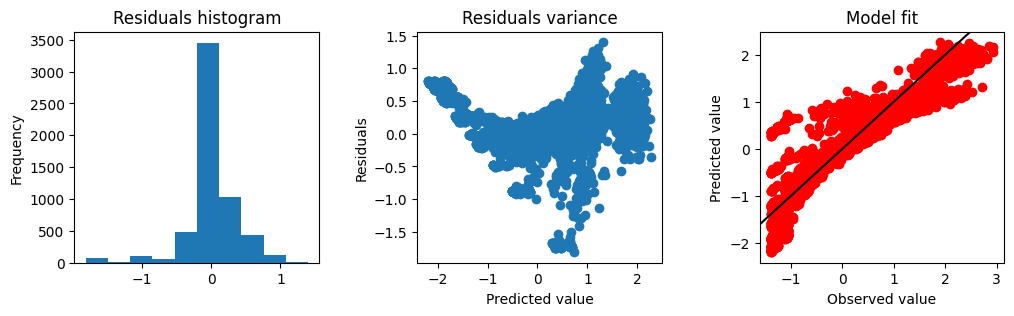

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3)) 

ax = axes[0]
model.resid.plot.hist(ax=ax)
ax.set_title("Residuals histogram")

ax = axes[1]
ax.scatter(
    x=model.fittedvalues,
    y=model.resid
)
ax.set_title("Residuals variance")
ax.set_ylabel("Residuals")
ax.set_xlabel("Predicted value")

ax = axes[2]
ax.scatter(
    x=results_mean.std_sim_yield,
    y=model.fittedvalues,
    color="r"
)
ax.axline((0, 0), slope=1, color="k")
ax.set_xlabel("Observed value")
ax.set_ylabel("Predicted value")
ax.set_title("Model fit")

plt.subplots_adjust(wspace=.4)

The Mixed effects linear model doesn't seem to be the most appropiate way of analyzing the results. Although residuals seem to be normally distributed around zero, their variance is not constant.

## Exponential plateau analysis

An exponential plateau function is an appropiate estimate of the increment in yield due to fertilizer application. This function describes a nearly linear increase in yield as the fertilizer ammount is increased from very small amounts, and a diminishing increase in yield as the fertilizer ammounts increase.

The increase in yield given the next function:
$$
y_x - (y_x-y_0)e^{-kx}
$$
where $y_x$ is the maximum attainable yield (plateau), $y_0$ is the base yield (no fertilizer), $k$ is the increase rate, and $x$ is the nitrogen fertilizer rate. Next plot shows an example where $y_x=5000$, $y_0=1000$, and $k=.01$.

Text(0, 0.5, 'Yield')

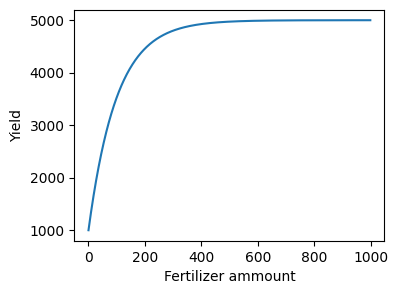

In [61]:
def exponential_plateau(nitro, rate, base, plateau):
    return plateau - (plateau - base)*np.exp(-rate*nitro)

x = np.arange(0, 1000, 1)
y = exponential_plateau(x, .01, 1000, 5000)

fig, ax = plt.subplots(1, 1, figsize=(4, 3))
ax.plot(x, y)
ax.set_xlabel("Fertilizer ammount")
ax.set_ylabel("Yield")

As the plateau as it is the maximum attainable yield, then it can be estimated by running DSSAT with no Nitrogen stress.

In [62]:
def run_single_year_no_nitro_stress(district, year):
    df_list = []
    for irr_level in IRRIGATION_LEVELS:
        sim_controls = IRRIGATION_LEVELS[irr_level]
        sim_controls["NITRO"] = "N"
        df, _ = run_district(
            admin_2=district, year=year, 
            nitro_rate=RECOMMENDED_NRATE,
            sim_controls=sim_controls
        )
        df["nitrogen"] = "No stress"
        df["irrigation"] = irr_level
        df["year"] = year
        df["admin_2"] = district
        df_list.append(df)
    return pd.concat(df_list)

# # Run simulations in parallel
# def wrap_run(treatment, return_list):
#     df = run_single_year_no_nitro_stress(*treatment)
#     # df = treatment
#     return_list.append(df)

# all_simulations = list(product(ADMIN2, list(range(2000, 2023))))

# manager = multiprocessing.Manager()
# return_list_no_nitro_stress = manager.list()

# n_jobs = 16
# jobs = []
# for n, sim in tqdm(list(enumerate(all_simulations))):
#     p = multiprocessing.Process(target=wrap_run, args=(sim, return_list_no_nitro_stress))
#     jobs.append(p)
#     p.start()
#     # print(sim)
#     if ((n+1) % n_jobs == 0) or (n+1 == len(all_simulations)):
#         for proc in jobs:
#             proc.join()
#             jobs = []
# results_no_nitro_stress = pd.concat(return_list_no_nitro_stress)

results_no_nitro_stress = pd.read_csv("data/experiment_no_nitro_stress_results.csv")

In [63]:
# results_no_nitro_stress.to_csv("data/experiment_no_nitro_stress_results.csv")

In [64]:
results = pd.concat([results, results_no_nitro_stress])

Now we can estimate the exponential plateau curve for each district. We expect that curve to be different from one district to the other, and from one season to the other. The minimum and maximum attainable yield deppend on the specific environmental conditions. Then, to analize the effect of Nitrogen fertilizer and Irrigation, one curve will be fit to each district and irrigation case for the average of a defined period. Having one curve per year does not provide much information. We can group the different seasons deppending on how dry or wet those seasons were. Therefore, each year was assigned to one of three categories: dry year, wet year, and normal year. This assignation was made based on quantiles using the average total precipitation during the growth season.

In [65]:
# tmp_df = results.loc[results.admin_2 == "Chivi"]
results_mean = results.groupby(["admin_2", "year", "nitrogen", "irrigation"]).apply(
    lambda gb: pd.Series({
        "sim_yield": gb.HARWT.astype(int).mean(),
        "rain": gb.RAIN.astype(int).mean()
        # "sim_yield": gb.loc[gb.FLO.astype(int) > 0].HARWT.astype(int).mean(),
    })
).dropna()

results_mean["nitro"] = results_mean.index.get_level_values(2).map({
    **NITROGEN_LEVELS, **{"No fertilizer": 0, "No stress":50}
})
results_mean["irr"] = results_mean.index.get_level_values(3).map(
    lambda x: IRRIGATION_LEVELS[x].get("ITHRL", 0)
) 
# Group year by Wet, normal, and dry years according to total rain quantiles
results_mean["year_type"] = results_mean.index.get_level_values(1).map(
    pd.qcut(results_mean.groupby(level="year").rain.mean(), q=3, labels=["Dry", "Normal", "Wet"])
)
results_mean = results_mean.reset_index().set_index([
    "admin_2", "year_type", "year", "nitrogen", "irrigation"
])

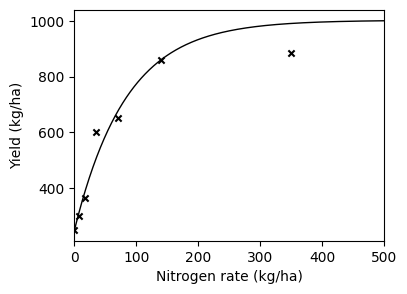

In [67]:
from scipy.optimize import lsq_linear

# Function to fit the exponential plateau. 
def fit_exponential_plateau(district, year_type, irrigation):
    tmp_df = results_mean.loc[(district, year_type, slice(None), slice(None), irrigation)].groupby(level="nitrogen").mean()
    tmp_df = tmp_df.sort_values(by="nitro")
    tmp_df["nitro"] *= RECOMMENDED_NRATE
    base = tmp_df.loc["No fertilizer", "sim_yield"]
    plateau = tmp_df.loc["No stress", "sim_yield"]
    tmp_df = tmp_df.loc[(tmp_df.sim_yield >= base) & (tmp_df.sim_yield <= plateau)]
    b = (
        np.log(plateau - base) -
        np.log(plateau - tmp_df.iloc[:-2].sim_yield + .0)
    ).to_numpy()
    b = np.array([b]).T
    a = tmp_df.iloc[:-2][["nitro"]].to_numpy()
    
    rate = lsq_linear(a, b.flatten()).x
    return base, plateau, rate, tmp_df

def plot_exponential_plateau(district, year_type, irrigation, ax, color="k"):
    base, plateau, rate, tmp_df = fit_exponential_plateau(district, year_type, irrigation)
    
    tmp_df.plot.scatter(
        x="nitro", y="sim_yield", ax=ax, marker="x", color=color,
        zorder=2
    )
    x = np.arange(0, 500)
    ax.plot(
        x,
        exponential_plateau(x, rate, base, plateau),
        color=color, zorder=1, linewidth=1
    )
    ax.set_xlabel("Nitrogen rate (kg/ha)")
    ax.set_ylabel("Yield (kg/ha)")
    ax.set_xlim(0, 500)
    # ax.set_xticklabels(ax.get_xticks()*RECOMMENDED_NRATE);


# Test the function to fit the exponential Plateau
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
plot_exponential_plateau("Hwange Rural", "Dry", "Rainfed", ax)

Now we can generate the curves for all sites, and analyze how important is fertilizer and irrigation deppending on the site and the type of season (dry, wet, normal).

### CNFA Sites

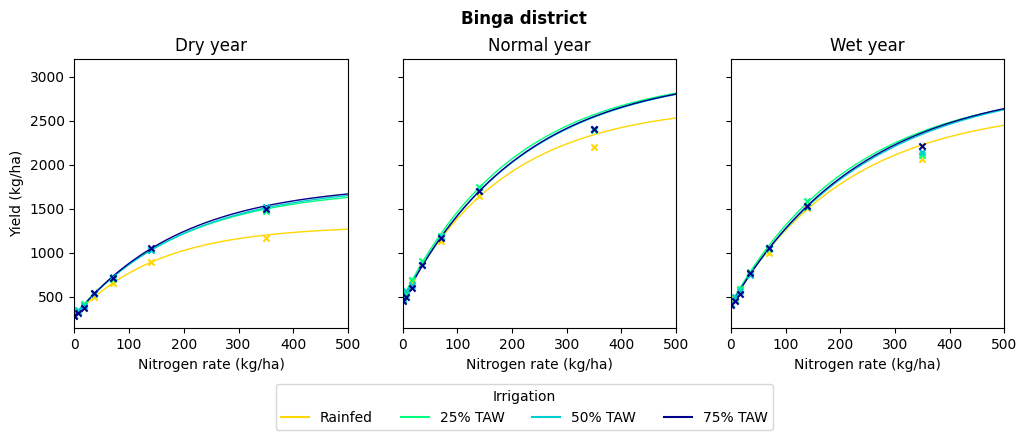

In [68]:
from matplotlib.lines import Line2D

irrigation_colors = {
    'Rainfed': "gold", '25% TAW': "springgreen",
     '50% TAW': "darkturquoise", '75% TAW': "darkblue"
}

def plateau_plot_district(district):
    fig, axes = plt.subplots(1, 3, figsize=(12, 3.5), sharex=True, sharey=True)
    for n, year_type in enumerate(("Dry", "Normal", "Wet")):
        ax = axes[n]
        for m, irr_type in enumerate(IRRIGATION_LEVELS):
            plot_exponential_plateau(district, year_type, irr_type, ax, irrigation_colors[irr_type])
        #     if n == 0:
        #         ax.set_title(irr_type)
        # axes[n][0].set_ylabel(f"{year_type} year\nyield(kg/ha)")
        ax.set_title(f"{year_type} year")
    fig.suptitle(f"{district} district", fontweight="bold", y=1.02)
    fig.legend(
        [Line2D([0], [0], color=irrigation_colors[ir]) for ir in irrigation_colors],
        irrigation_colors.keys(), ncols=4, loc="lower center", bbox_to_anchor=(.5, -0.2),
        title="Irrigation"
    )
    fig.show()
    
plateau_plot_district("Binga")

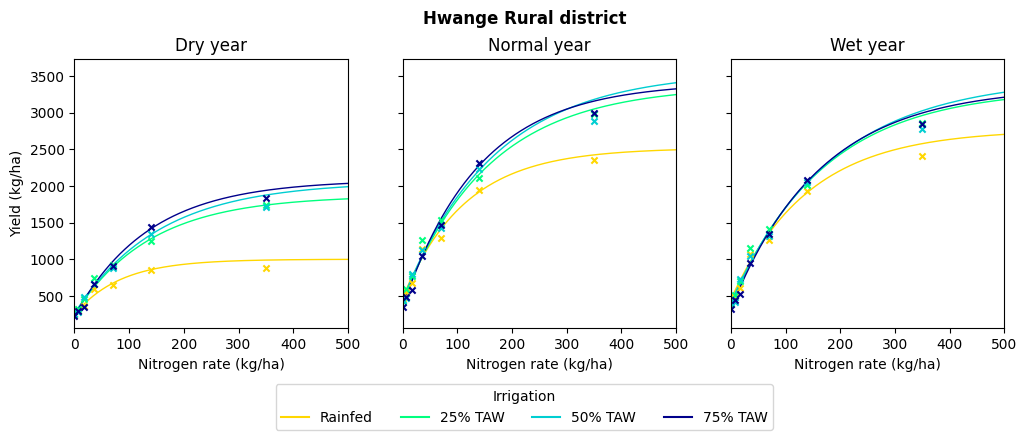

In [69]:
plateau_plot_district("Hwange Rural")

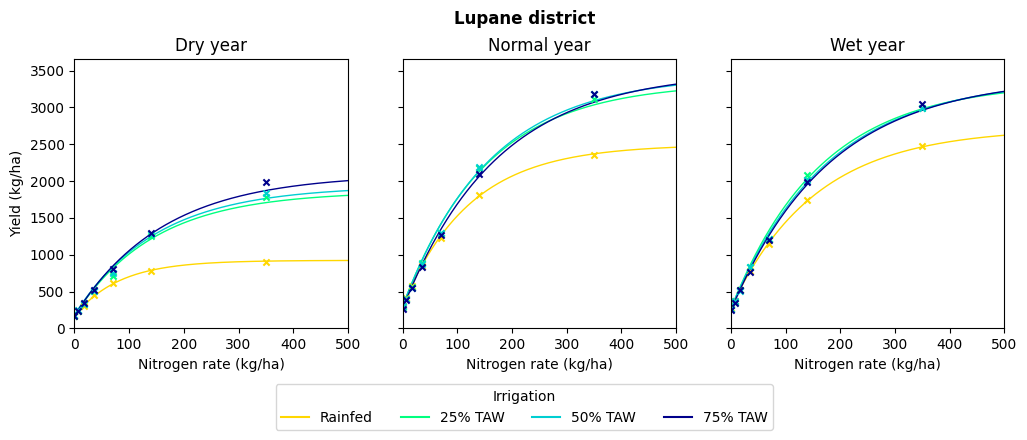

In [70]:
plateau_plot_district("Lupane")

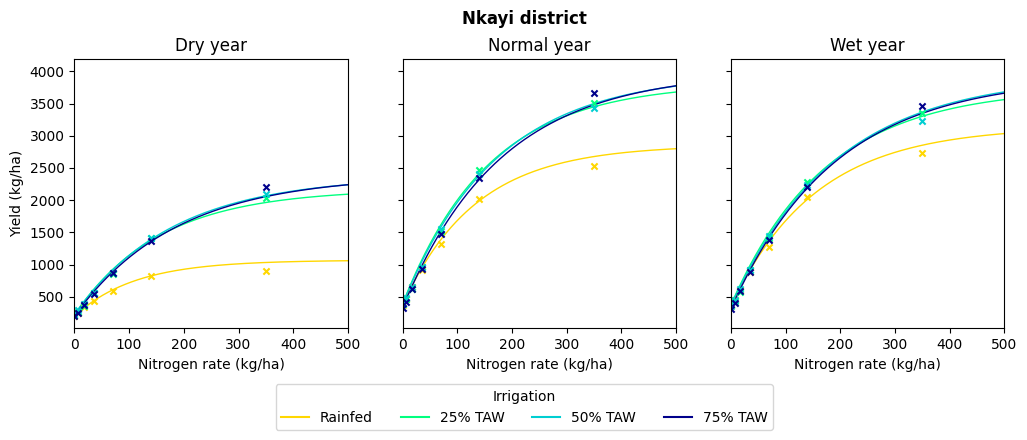

In [71]:
plateau_plot_district("Nkayi")

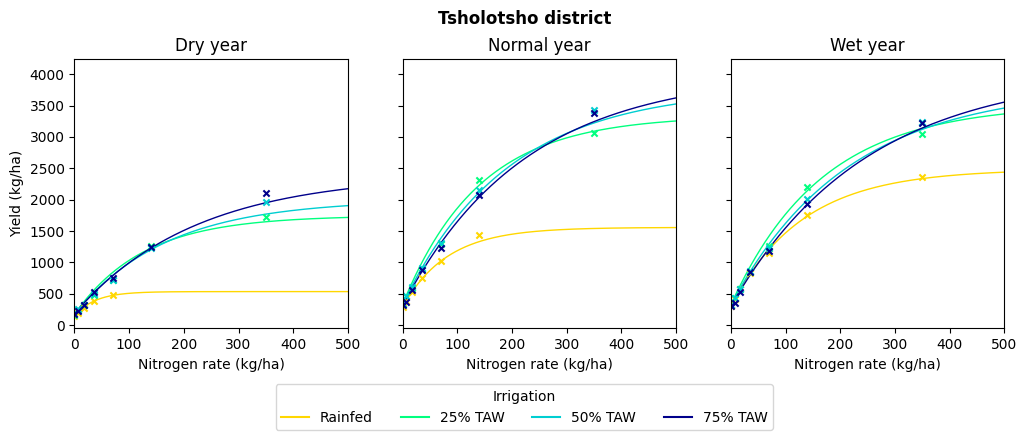

In [72]:
plateau_plot_district("Tsholotsho")

### CARE Sites

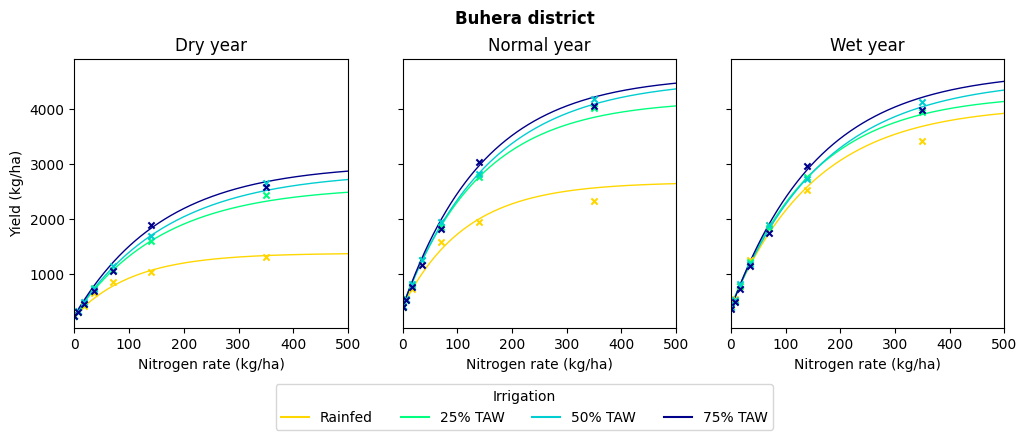

In [73]:
plateau_plot_district("Buhera")

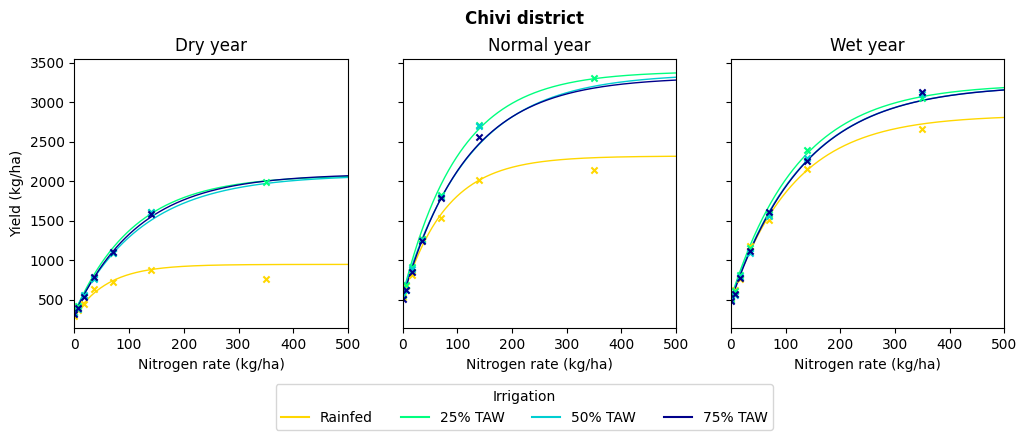

In [74]:
plateau_plot_district("Chivi")

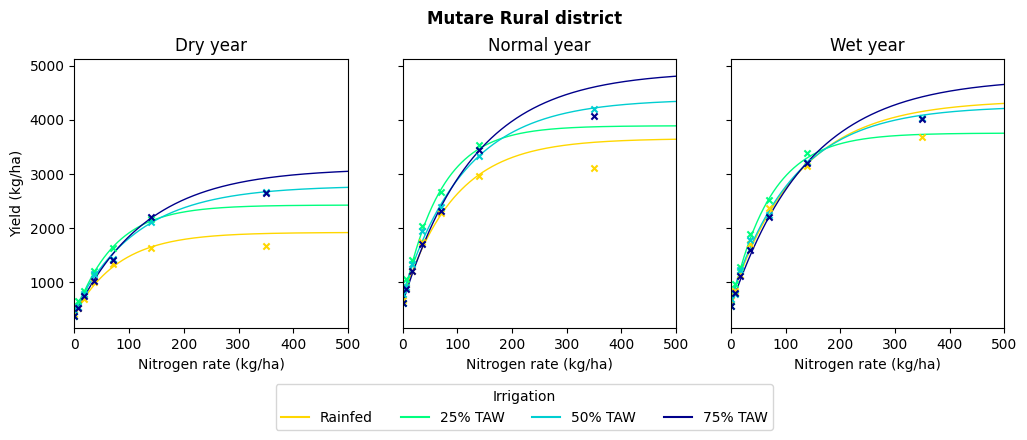

In [75]:
plateau_plot_district("Mutare Rural")

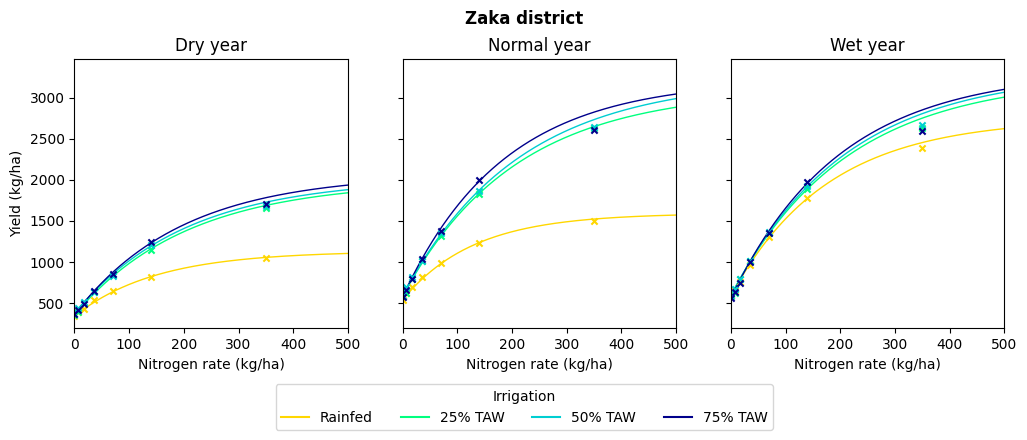

In [76]:
plateau_plot_district("Zaka")